In [2]:
import os
import zipfile
import datetime
!pip install mlxtend
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import mlxtend
from sklearn import metrics
from sklearn.metrics import confusion_matrix , f1_score
from mlxtend.plotting import plot_confusion_matrix
get_ipython().system('pip install pandas')
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns # for data visualization

In [3]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(250, 250, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

#usamos el tamaño de 250x250 porque computacionalmente es mucho más eficiente

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configuración y compilación del modelo
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])








last layer output shape: (None, 13, 13, 768)


In [4]:
base_dir = 'BaseFotos'
train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training arritmia pictures
train_arritmia_dir = os.path.join(train_dir, 'Arritmia')

# Directory with our training normal pictures
train_normal_dir = os.path.join(train_dir, 'Normal')

# Directory with our validation arritmia pictures
test_arritmia_dir = os.path.join(test_dir, 'Arritmia')

# Directory with our validation normal pictures
test_normal_dir = os.path.join(test_dir, 'Normal')

train_arritmia_fnames = os.listdir(train_arritmia_dir)

train_normal_fnames = os.listdir(train_normal_dir)



In [5]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=1,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 11 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(250, 250),  
        batch_size=11,
        class_mode='binary')

# Flow validation images in batches of 11 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(250, 250),
        batch_size=11,
        class_mode='binary')

Found 1010 images belonging to 2 classes.
Found 137 images belonging to 2 classes.


In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=test_generator,
      validation_steps=11,
      verbose=2)

model.summary()


Epoch 1/15
20/20 - 59s - loss: 1.5325 - acc: 0.5500 - val_loss: 0.6266 - val_acc: 0.7025
Epoch 2/15
20/20 - 52s - loss: 0.8630 - acc: 0.6364 - val_loss: 1.5399 - val_acc: 0.4628
Epoch 3/15
20/20 - 51s - loss: 0.5896 - acc: 0.7091 - val_loss: 0.9228 - val_acc: 0.5950
Epoch 4/15
20/20 - 48s - loss: 0.6763 - acc: 0.7182 - val_loss: 0.8064 - val_acc: 0.6281
Epoch 5/15
20/20 - 49s - loss: 0.6283 - acc: 0.7182 - val_loss: 0.9985 - val_acc: 0.5785
Epoch 6/15
20/20 - 48s - loss: 0.5380 - acc: 0.7773 - val_loss: 0.7342 - val_acc: 0.6116
Epoch 7/15
20/20 - 49s - loss: 0.5763 - acc: 0.7636 - val_loss: 0.7382 - val_acc: 0.6116
Epoch 8/15
20/20 - 52s - loss: 0.4867 - acc: 0.7706 - val_loss: 0.5852 - val_acc: 0.7769
Epoch 9/15
20/20 - 54s - loss: 0.4122 - acc: 0.7909 - val_loss: 0.6853 - val_acc: 0.6860
Epoch 10/15
20/20 - 55s - loss: 0.3888 - acc: 0.8409 - val_loss: 0.5598 - val_acc: 0.7686
Epoch 11/15
20/20 - 55s - loss: 0.3902 - acc: 0.8364 - val_loss: 1.2698 - val_acc: 0.5785
Epoch 12/15
20/20 -

Accuracy Score : [0.9772727489471436, 0.9727272987365723, 0.9454545378684998, 0.9409090876579285, 0.9727272987365723, 0.9454545378684998, 0.9545454382896423, 0.9636363387107849, 0.9818181991577148, 0.9545454382896423, 0.9681817889213562, 0.9636363387107849, 0.9818181991577148, 0.9727272987365723, 0.9909090995788574]
AReport : 
[0.8181818127632141, 0.8677685856819153, 0.8264462947845459, 0.8429751992225647, 0.8595041036605835, 0.8595041036605835, 0.8347107172012329, 0.8512396812438965, 0.8181818127632141, 0.8264462947845459, 0.8512396812438965, 0.8429751992225647, 0.8595041036605835, 0.8347107172012329, 0.8264462947845459]
Loss Score : [0.11194667220115662, 0.1106976792216301, 0.1326288878917694, 0.13999654352664948, 0.10801281780004501, 0.14247751235961914, 0.1094817966222763, 0.10895746201276779, 0.08730284869670868, 0.12320302426815033, 0.09572631120681763, 0.0976184830069542, 0.07784636318683624, 0.09824118763208389, 0.08390726894140244]
LReport : 
[0.5152712464332581, 0.41302174329

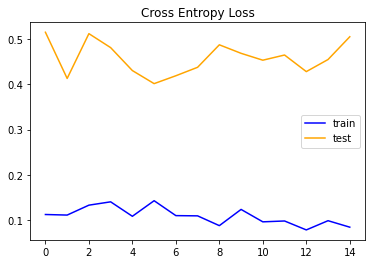

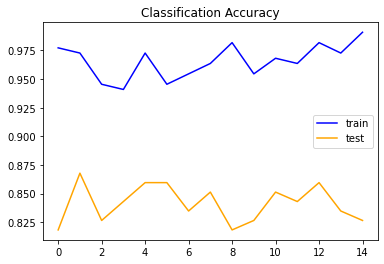

<Figure size 432x288 with 0 Axes>

In [96]:
model.save_weights("pretrainedtesting_weights.h5")

# Retrieve a list of accuracy and loss results on training and validation data
acc = history.history['acc']
test_acc = history.history['val_acc']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(len(acc))

plt.subplot(111)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
# plot accuracy
plt.figure()
plt.subplot(111)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='test')
plt.legend()
plt.figure()

print ('Accuracy Score :',history.history['acc'] )
print ('AReport : ')
print (history.history['val_acc']) 
print ('Loss Score :',history.history['loss'] )
print ('LReport : ')
print (history.history['val_loss']) 

labels=['normal','arritmia']

In [6]:
unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True
    
    
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# As an optimizer, here we will use SGD with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.0001, 
                  momentum=0.9),
              metrics=['acc'])

Epoch 1/15
20/20 - 60s - loss: 0.1119 - acc: 0.9773 - val_loss: 0.5153 - val_acc: 0.8182
Epoch 2/15
20/20 - 45s - loss: 0.1107 - acc: 0.9727 - val_loss: 0.4130 - val_acc: 0.8678
Epoch 3/15
20/20 - 48s - loss: 0.1326 - acc: 0.9455 - val_loss: 0.5121 - val_acc: 0.8264
Epoch 4/15
20/20 - 45s - loss: 0.1400 - acc: 0.9409 - val_loss: 0.4812 - val_acc: 0.8430
Epoch 5/15
20/20 - 48s - loss: 0.1080 - acc: 0.9727 - val_loss: 0.4305 - val_acc: 0.8595
Epoch 6/15
20/20 - 48s - loss: 0.1425 - acc: 0.9455 - val_loss: 0.4015 - val_acc: 0.8595
Epoch 7/15
20/20 - 48s - loss: 0.1095 - acc: 0.9545 - val_loss: 0.4190 - val_acc: 0.8347
Epoch 8/15
20/20 - 48s - loss: 0.1090 - acc: 0.9636 - val_loss: 0.4377 - val_acc: 0.8512
Epoch 9/15
20/20 - 47s - loss: 0.0873 - acc: 0.9818 - val_loss: 0.4875 - val_acc: 0.8182
Epoch 10/15
20/20 - 46s - loss: 0.1232 - acc: 0.9545 - val_loss: 0.4686 - val_acc: 0.8264
Epoch 11/15
20/20 - 59s - loss: 0.0957 - acc: 0.9682 - val_loss: 0.4534 - val_acc: 0.8512
Epoch 12/15
20/20 -

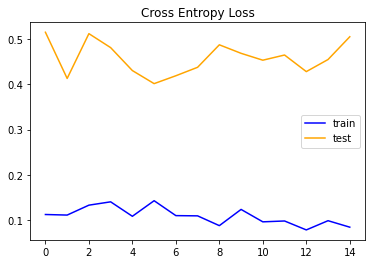

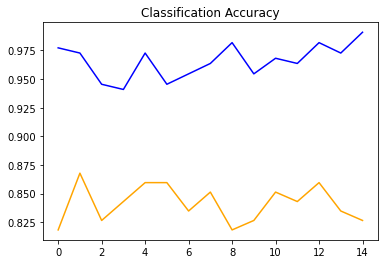

<Figure size 432x288 with 0 Axes>

In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=test_generator,
      validation_steps=11,
      verbose=2,
      shuffle=False,
      callbacks=[tensorboard_callback])



model.summary()
# Retrieve a list of accuracy and loss results on training and validation data
acc = history.history['acc']
test_acc = history.history['val_acc']


loss = history.history['loss']
test_loss = history.history['val_loss']


epochs = range(len(acc))

plt.subplot(111)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
# plot accuracy
plt.figure()
plt.subplot(111)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='test')


plt.figure()

print ('Accuracy Score :',history.history['acc'] )
print ('AReport : ')
print (history.history['val_acc']) 
print ('Loss Score :',history.history['loss'] )
print ('LReport : ')
print (history.history['val_loss']) 

Model evaluate:
 [0.45863568782806396, 0.8467153310775757]
Métricas del modelo:
               precision    recall  f1-score   support

      normal       0.53      0.54      0.54        78
    arritmia       0.38      0.37      0.38        59

    accuracy                           0.47       137
   macro avg       0.46      0.46      0.46       137
weighted avg       0.47      0.47      0.47       137

Matriz de confusión:
 [[42 36]
 [37 22]]


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

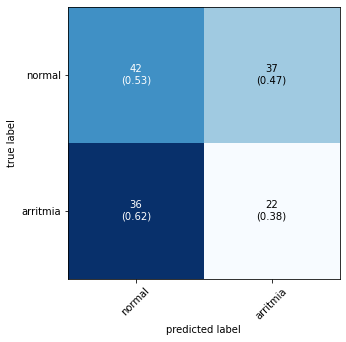

In [52]:
#model.save_weights("pretrainedSGDtesting_weights.h5")
model.load_weights("pretrainedSGDtesting_weights.h5")

import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix

predictions=model.predict_generator(generator=test_generator,verbose=0)
labels=['normal','arritmia']

y_pred = predictions.round()
y_real = test_generator.classes

print("Model evaluate:\n", model.evaluate_generator(test_generator))

predicted_class_indices=np.argmax(predictions,axis=1)

y_real = test_generator.classes

print("Métricas del modelo:\n" ,metrics.classification_report(y_pred, y_real,target_names=labels))
print("Matriz de confusión:\n" ,metrics.confusion_matrix(y_pred, y_real))
    
matc=confusion_matrix(y_real,y_pred)

plot_confusion_matrix(conf_mat=matc,figsize=(5,5),class_names=labels,show_normed=True)

########################


Model evaluate:
 [0.4586356282234192, 0.8467153310775757]
Métricas del modelo:
               precision    recall  f1-score   support

      normal       0.58      0.59      0.59        78
    arritmia       0.45      0.44      0.44        59

    accuracy                           0.53       137
   macro avg       0.52      0.52      0.52       137
weighted avg       0.52      0.53      0.53       137

Matriz de confusión:
 [[46 32]
 [33 26]]


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

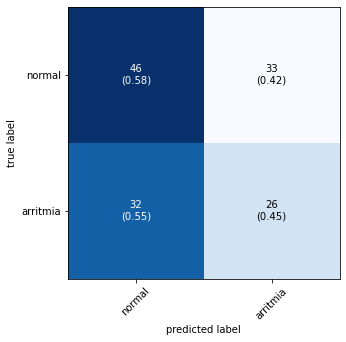

In [53]:
predictions=model.predict_generator(generator=test_generator,verbose=0)
labels=['normal','arritmia']

y_pred = predictions.round()
y_real = test_generator.classes

print("Model evaluate:\n", model.evaluate_generator(test_generator))

predicted_class_indices=np.argmax(predictions,axis=1)

y_real = test_generator.classes

print("Métricas del modelo:\n" ,metrics.classification_report(y_pred, y_real,target_names=labels))
print("Matriz de confusión:\n" ,metrics.confusion_matrix(y_pred, y_real))
    
matc=confusion_matrix(y_real,y_pred)

plot_confusion_matrix(conf_mat=matc,figsize=(5,5),class_names=labels,show_normed=True)

